In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud_data=pd.read_csv('Fraud_check.csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud_data.shape

(600, 6)

In [4]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [7]:
from sklearn.preprocessing import LabelEncoder
le_encoder=LabelEncoder()
fraud_data['Undergrad']=le_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Urban']=le_encoder.fit_transform(fraud_data['Urban'])
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,Single,68833,50047,10,1
1,1,Divorced,33700,134075,18,1
2,0,Married,36925,160205,30,1
3,1,Single,50190,193264,15,1
4,0,Married,81002,27533,28,0
...,...,...,...,...,...,...
595,1,Divorced,76340,39492,7,1
596,1,Divorced,69967,55369,2,1
597,0,Divorced,47334,154058,0,1
598,1,Married,98592,180083,17,0


In [8]:
fraud_data=pd.get_dummies(data=fraud_data,columns=['Marital.Status'],drop_first=True)
fraud_data

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,0,1
1,1,33700,134075,18,1,0,0
2,0,36925,160205,30,1,1,0
3,1,50190,193264,15,1,0,1
4,0,81002,27533,28,0,1,0
...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,0,0
596,1,69967,55369,2,1,0,0
597,0,47334,154058,0,1,0,0
598,1,98592,180083,17,0,1,0


In [9]:
fraud_data=fraud_data.assign(taxgrp=pd.cut(fraud_data['Taxable.Income'],bins=[0,30000,1000000],labels=['Risky','Good']))
fraud_data.head(11)

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,taxgrp
0,0,68833,50047,10,1,0,1,Good
1,1,33700,134075,18,1,0,0,Good
2,0,36925,160205,30,1,1,0,Good
3,1,50190,193264,15,1,0,1,Good
4,0,81002,27533,28,0,1,0,Good
5,0,33329,116382,0,0,0,0,Good
6,0,83357,80890,8,1,0,0,Good
7,1,62774,131253,3,1,0,1,Good
8,0,83519,102481,12,1,0,1,Good
9,1,98152,155482,4,1,0,0,Good


In [10]:
fraud_data=pd.get_dummies(data=fraud_data,columns=['taxgrp'],drop_first=True)
fraud_data.head(15)


,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Married,Marital.Status_Single,taxgrp_Good
0,0,68833,50047,10,1,0,1,1
1,1,33700,134075,18,1,0,0,1
2,0,36925,160205,30,1,1,0,1
3,1,50190,193264,15,1,0,1,1
4,0,81002,27533,28,0,1,0,1
5,0,33329,116382,0,0,0,0,1
6,0,83357,80890,8,1,0,0,1
7,1,62774,131253,3,1,0,1,1
8,0,83519,102481,12,1,0,1,1
9,1,98152,155482,4,1,0,0,1


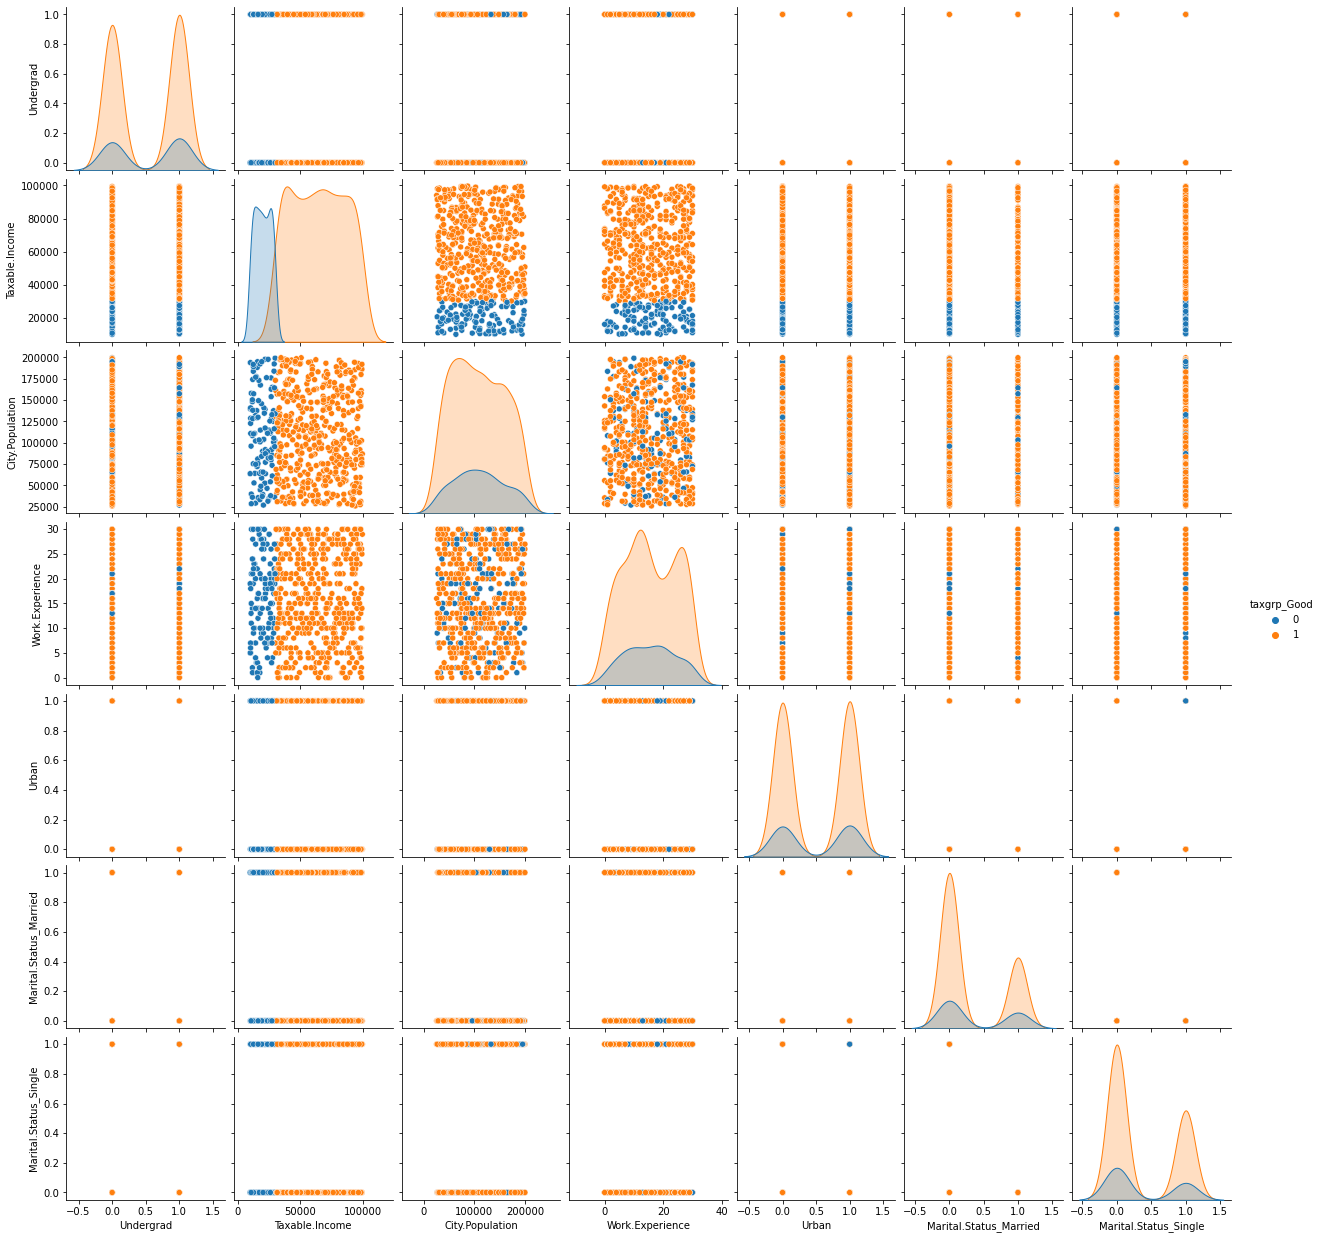

In [11]:
sns.pairplot(data=fraud_data,hue='taxgrp_Good')
plt.show()

### Model Building


In [12]:
x=fraud_data.drop('taxgrp_Good',axis=1)
y=fraud_data[['taxgrp_Good']]

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

In [14]:
x_train.shape,y_train.shape

((480, 7), (480, 1))

In [15]:
x_test.shape,y_test.shape

((120, 7), (120, 1))

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=3)
rf_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [17]:
from sklearn.model_selection import GridSearchCV
grid_search_cv=GridSearchCV(estimator=rf_model,param_grid={'criterion':['entropy','gini'],'max_depth':[1,2,3,4,5]},cv=5)

grid_search_cv.fit(x,y)
print(grid_search_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 4}


### Plot the tree

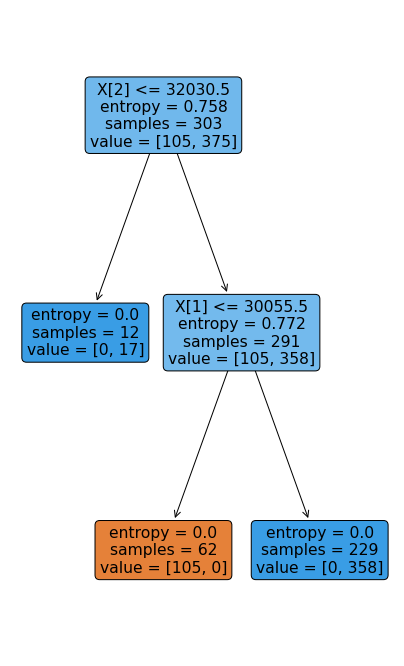

In [18]:
from sklearn import tree
plt.figure(figsize=(7,12))
tree.plot_tree(rf_model.estimators_[10],rounded=True,filled=True,max_depth=3)
plt.show()

### Model Testing || Model Evaluation

In [19]:
y_pred=rf_model.predict(x_test)

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('------------------------------------------')
print('Confusion Matrix :\n',confusion_matrix(y_test,y_pred))
print('------------------------------------------')
print('Classification Report :\n',classification_report(y_test,y_pred))

Accuracy Score : 1.0
------------------------------------------
Confusion Matrix :
 [[26  0]
 [ 0 94]]
------------------------------------------
Classification Report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        94

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

